<a href="https://colab.research.google.com/github/iacisme/Colab_Notebooks/blob/main/Ontario_COVID_Hospitalizations_by_Vaccination_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Government of Ontario COVID data

These graphs were once published by the Government of Ontario, on a daily basis. Now, the Government only make the dataset avaialbe weekly.

This graph is based on Government published data as of June 15, 2022:

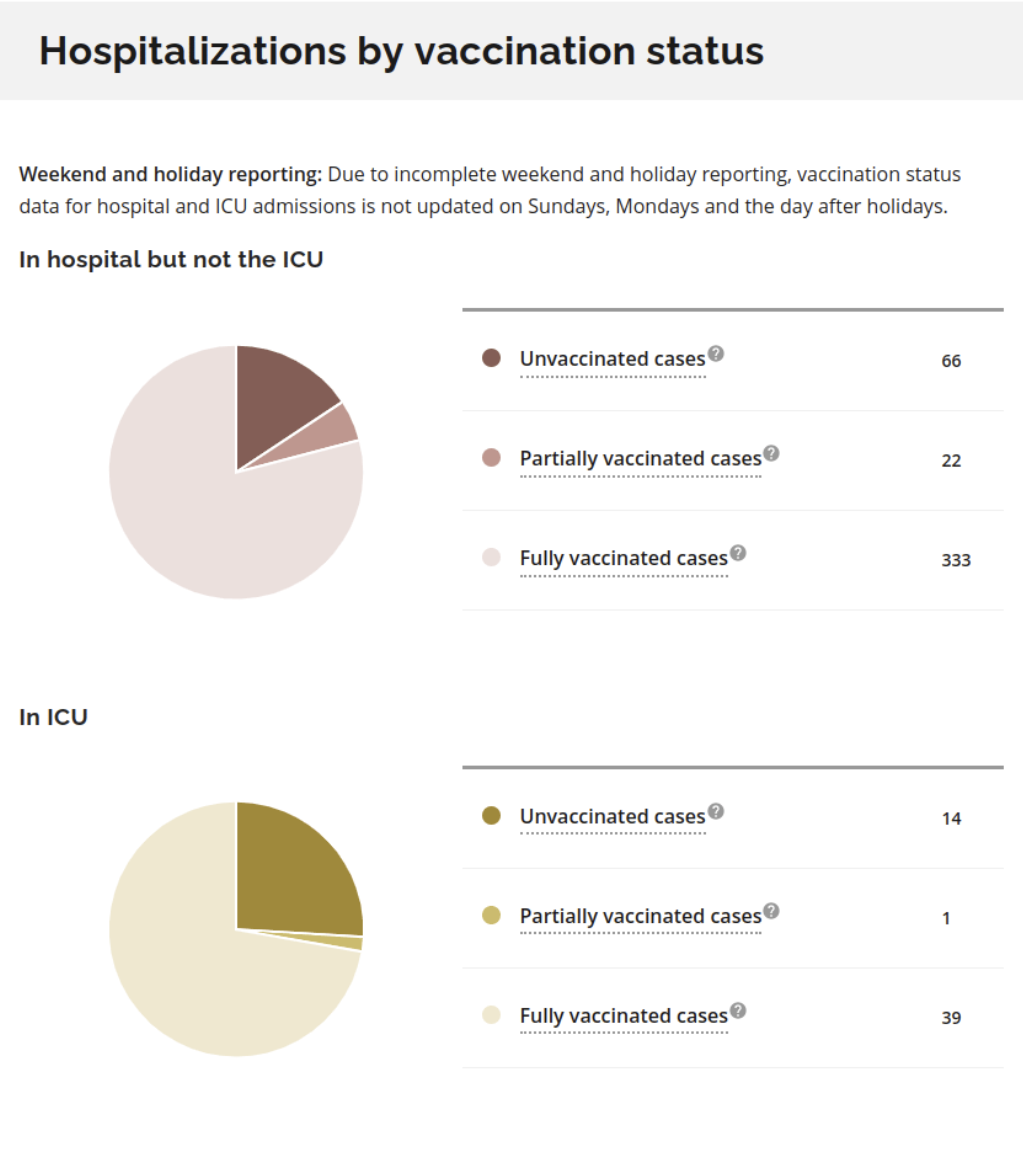

## Purpose 

The purpose of this notebook is to replicate these graphs using free and open source tools.

## Hospitalizations by vaccination status

**Data Soure** - This information is published by the `Ontario Government` on their COVID-19 website: [Hospitalizations by vaccination status](https://data.ontario.ca/en/dataset/covid-19-vaccine-data-in-ontario/resource/274b819c-5d69-4539-a4db-f2950794138c). 

The `Ontario Government` makes this dataset availble as a `csv` file. It's updated weekly.

## Libraries

The following libraries are required to run this notebook:

In [1]:
# Library used to handle arrays and array-like objects
import numpy as np

In [2]:
# Library to create and manipulate tabular data
import pandas as pd

In [3]:
# Library to create interactive controls and outputs
import ipywidgets as widgets

In [4]:
# Allows for plot groupings
from plotly.subplots import make_subplots

In [5]:
# Plotly libraries for creating graphs
import plotly.express as px

In [6]:
# Plotly library for creating graph objects
import plotly.graph_objects as go

In [7]:
# Set plotly as the default backend
pd.options.plotting.backend = "plotly"

## Loading the file into a dataframe

The following code will go the this website and load the most current `csv` file into memory

In [8]:
# The url of the website that that automatically downloads a csv file for you
url = 'https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/274b819c-5d69-4539-a4db-f2950794138c/download/vac_status_hosp_icu.csv'

In [9]:
# Code will create a dataframe object
hospitalizatios_by_vaccination_status = pd.read_csv(url)

hospitalizatios_by_vaccination_status

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac
0,2021-08-10,22,3,0,23,4,11
1,2021-08-11,37,5,2,34,7,8
2,2021-08-12,45,5,2,44,7,9
3,2021-08-13,52,5,3,65,6,8
4,2021-08-14,53,4,1,67,6,11
...,...,...,...,...,...,...,...
313,2022-06-19,8,6,37,68,7,276
314,2022-06-20,8,6,34,72,9,271
315,2022-06-21,6,6,43,84,12,286
316,2022-06-22,7,8,38,75,16,278


In [10]:
# Inpsect the information
hospitalizatios_by_vaccination_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        318 non-null    object
 1   icu_unvac                   318 non-null    int64 
 2   icu_partial_vac             318 non-null    int64 
 3   icu_full_vac                318 non-null    int64 
 4   hospitalnonicu_unvac        318 non-null    int64 
 5   hospitalnonicu_partial_vac  318 non-null    int64 
 6   hospitalnonicu_full_vac     318 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.5+ KB


There are no missing values, and the object types look correct. 

In order to use date and time functions, the `date` fields needs to be wrangled.

## Formatting the `date` field

The purpose of these steps is to format the `date` field so it can be used to search for data between a date range.

In [11]:
# Create a new field called ISO Date, that will convert the 'date' into an ISO date
# You need to do this in order to get the week number
hospitalizatios_by_vaccination_status['ISO Date'] = pd.to_datetime(hospitalizatios_by_vaccination_status['date'], errors = 'coerce')

hospitalizatios_by_vaccination_status

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,ISO Date
0,2021-08-10,22,3,0,23,4,11,2021-08-10
1,2021-08-11,37,5,2,34,7,8,2021-08-11
2,2021-08-12,45,5,2,44,7,9,2021-08-12
3,2021-08-13,52,5,3,65,6,8,2021-08-13
4,2021-08-14,53,4,1,67,6,11,2021-08-14
...,...,...,...,...,...,...,...,...
313,2022-06-19,8,6,37,68,7,276,2022-06-19
314,2022-06-20,8,6,34,72,9,271,2022-06-20
315,2022-06-21,6,6,43,84,12,286,2022-06-21
316,2022-06-22,7,8,38,75,16,278,2022-06-22


A new field was created, but it's at the end of the dataframe, the code below will re-sequence our database, and drop the `date` field, it's now a redundant field. The data will also be re-organized so hospitalizations are first, followed by ICU.

In [12]:
# Re-sequence all the columns
hospitalizatios_by_vaccination_status = hospitalizatios_by_vaccination_status[['ISO Date',
                                                                               'date',  
                                                                               'hospitalnonicu_unvac', 
                                                                               'hospitalnonicu_partial_vac', 
                                                                               'hospitalnonicu_full_vac', 
                                                                               'icu_unvac', 
                                                                               'icu_partial_vac', 
                                                                               'icu_full_vac'
                                                                               ]
                                                                               ]

hospitalizatios_by_vaccination_status    

,ISO Date,date,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_unvac,icu_partial_vac,icu_full_vac
0,2021-08-10,2021-08-10,23,4,11,22,3,0
1,2021-08-11,2021-08-11,34,7,8,37,5,2
2,2021-08-12,2021-08-12,44,7,9,45,5,2
3,2021-08-13,2021-08-13,65,6,8,52,5,3
4,2021-08-14,2021-08-14,67,6,11,53,4,1
...,...,...,...,...,...,...,...,...
313,2022-06-19,2022-06-19,68,7,276,8,6,37
314,2022-06-20,2022-06-20,72,9,271,8,6,34
315,2022-06-21,2022-06-21,84,12,286,6,6,43
316,2022-06-22,2022-06-22,75,16,278,7,8,38


### First day in dataset

The following script will identify the first day in the dataset.

In [13]:
first_day = hospitalizatios_by_vaccination_status['date'].min()

first_day

'2021-08-10'

### Last day in dataset

The following script will identify the last day in the dataset.

In [14]:
last_day = hospitalizatios_by_vaccination_status['date'].max()

last_day

'2022-06-23'

## Creating a date picker

The purpose of this section is to create some date pickers that can be used to query the data using a date range.

### Start date picker

In [15]:
# Object that creates a date picker widget
start_date_pick = widgets.DatePicker(description = 'Start Date',
                                     disabled = False
                                     )

start_date_pick

DatePicker(value=None, description='Start Date')

### End date picker

In [16]:
# Object ot store the end date picker
end_date_pick = widgets.DatePicker(description = 'End Date',
                                   disabled = False
                                   )

end_date_pick

DatePicker(value=None, description='End Date')

## Using the date picker

This section shows provides an example of how these date pickers can be used to create a selection from the dataframe.

### Converting to ISO date

This code extracts the date picked by the user and converts this into an `ISO Date`, which can then be used to search the dataframe.

#### Start Date Conversion

In [19]:
# Object stores the value stored in the date picker
start_date = start_date_pick.value

start_date

datetime.date(2022, 6, 14)

In [20]:
# Object stores the converted value into a usable format
start = start_date.isoformat()

start

'2022-06-14'

#### End Date Conversion

In [21]:
# Object stores the value stored in the date picker
end_date = end_date_pick.value

end_date

datetime.date(2022, 6, 26)

In [22]:
# Object stores the converted value into a usable format
end = end_date.isoformat()

end

'2022-06-26'

### Using these results to make a query

The code below uses the `start` and `end` object to make a query selection of the data, notice that you only get back values within the date range.

In [23]:
# Create a data frame based on the date selection range.
# In order for this to work, you must use an ISO value
hospitalizatios_by_vaccination_status[hospitalizatios_by_vaccination_status['ISO Date'].isin(pd.date_range(start, end))]

,ISO Date,date,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,icu_unvac,icu_partial_vac,icu_full_vac
308,2022-06-14,2022-06-14,68,16,320,9,7,37
309,2022-06-15,2022-06-15,70,16,304,8,5,35
310,2022-06-16,2022-06-16,67,18,298,12,6,34
311,2022-06-17,2022-06-17,63,16,289,9,7,36
312,2022-06-18,2022-06-18,67,12,302,8,6,35
313,2022-06-19,2022-06-19,68,7,276,8,6,37
314,2022-06-20,2022-06-20,72,9,271,8,6,34
315,2022-06-21,2022-06-21,84,12,286,6,6,43
316,2022-06-22,2022-06-22,75,16,278,7,8,38
317,2022-06-23,2022-06-23,73,12,270,7,7,38


## Putting this altogether

This code will create an inter-active control where you can make a selection based on the date range.

In [24]:
# This function will create an interactive control where you can make a selection of the data
# based on a date range.
@widgets.interact
def hist_inspect(sday = start_date_pick, eday = end_date_pick):

    # Variables used to store
    # the start and end dates
    start = sday
    end = eday

    # Used for intial values
    if start is None:
        start = first_day
        
    if end is None:
        end = last_day

    # Create a data frame based on the date selection range.
    # In order for this to work, you must use an ISO value
    result_by_selection = hospitalizatios_by_vaccination_status[hospitalizatios_by_vaccination_status['ISO Date'].isin(pd.date_range(start, end))]

    display(result_by_selection)

interactive(children=(DatePicker(value=datetime.date(2022, 6, 14), description='Start Date'), DatePicker(value…

## Replicating the Ontario Government Graphs

This section will show how to replicate these graphs using plotly:

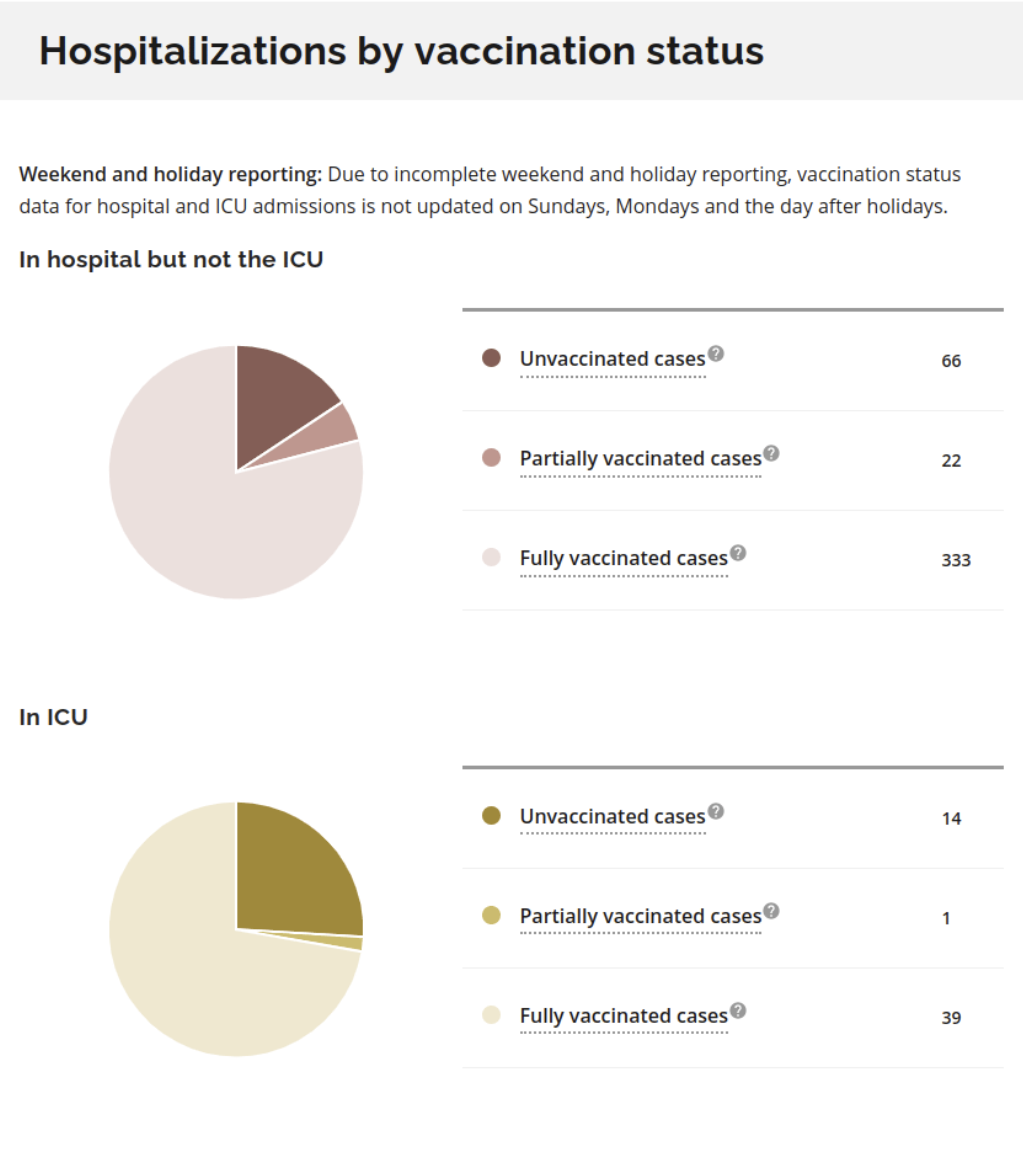


### Creating labels for plotting

The scripts below will create the first pie-chart, for `In hospital but not ICU`.

In [26]:
# Labels that will be used in the data
labels = ['Unvaccinated cases',
          'Partially vaccinated cases',
          'Fully vaccinated cases'
          ]

### In hospital but not the ICU

The scripts below will create the first pie-chart, for `In hospital but not ICU`.

In [27]:
# Set the color pallette for hospitalization
# Unvaccinated = 'rgb(131, 94, 86)'
# Partially vaccinated = 'rgb(190, 151, 143)'
# Fully vaccinated = 'rgb(235, 224, 221)'
hospitalization_colors = ['rgb(131, 94, 86)',   
                          'rgb(190, 151, 143)', 
                          'rgb(235, 224, 221)', 
                          ]

In [63]:
# This function will create an interactive control where you can make a selection of the data
# based on a date range.
@widgets.interact
def pie_chart_hosp(sday = start_date_pick, eday = end_date_pick):

    # Variables used to store
    # the start and end dates
    start = sday
    end = eday

    # Used for intial values
    if start is None:
        start = first_day
        
    if end is None:
        end = last_day

    # Create a data frame based on the date selection range.
    # In order for this to work, you must use an ISO value
    result_by_selection = hospitalizatios_by_vaccination_status[hospitalizatios_by_vaccination_status['ISO Date'].isin(pd.date_range(start, end))]

    #display(result_by_selection)

    # Organize the values into sums that can be graphed
    values_hosp = [result_by_selection['hospitalnonicu_unvac'].sum(), 
                   result_by_selection['hospitalnonicu_partial_vac'].sum(), 
                   result_by_selection['hospitalnonicu_full_vac'].sum()
                   ]

    # Create a figure object to store the pie chart 
    fig = go.Figure(data = [go.Pie(labels = labels, 
                                   values = values_hosp,
                                   marker_colors = hospitalization_colors,
                                   direction = 'clockwise',
                                   sort = False,
                                   )  
                            ]
                    )

    # Update the pie-chart 
    fig.update_traces(hoverinfo = 'label+percent', 
                      textinfo = 'none', # 'percent' 
                      textfont_size = 15,
                      marker = dict(#colors = colors, 
                                    line = dict(color = '#FFFFFF', width = 5)
                                    )
                    )

    # Update the plotting layout 
    fig.update_layout(plot_bgcolor = None,
                      title = f"In hospital but not ICU from {start} to {end}",
                      legend_title = "Vaccination Status",
                      font = dict(#family = "Courier New, monospace",
                                  size = 18,
                                  #color = "RebeccaPurple"
                                  ),
                    
                      height = 600,
                      width = 800,
                     )
    
    print(f"\nTotal Unvaccinated: {result_by_selection['hospitalnonicu_unvac'].sum()}")
    print(f"Total Partially Vaccinated: {result_by_selection['hospitalnonicu_partial_vac'].sum()}")
    print(f"Total Fully Vaccinated: {result_by_selection['hospitalnonicu_full_vac'].sum()}")

    fig.show()   

interactive(children=(DatePicker(value=datetime.date(2021, 8, 16), description='Start Date'), DatePicker(value…

### In ICU

In [29]:
# Set the color pallette for ICU
icu_colors = ['rgb(159, 137, 60)',   # Unvaccinated
              'rgb(203, 187, 111)',  # Partially vaccinated
              'rgb(239, 232, 208)',  # Fully vaccinated
              ]

In [64]:
# This function will create an interactive control where you can make a selection of the data
# based on a date range.
@widgets.interact
def pie_chart_icu(sday = start_date_pick, eday = end_date_pick):

    # Variables used to store
    # the start and end dates
    start = sday
    end = eday

    # Used for intial values
    if start is None:
        start = first_day
        
    if end is None:
        end = last_day

    # Create a data frame based on the date selection range.
    # In order for this to work, you must use an ISO value
    result_by_selection = hospitalizatios_by_vaccination_status[hospitalizatios_by_vaccination_status['ISO Date'].isin(pd.date_range(start, end))]

    #display(result_by_selection)

    # Organize the values into sums that can be graphed
    values_icu = [result_by_selection['icu_unvac'].sum(), 
                  result_by_selection['icu_partial_vac'].sum(), 
                  result_by_selection['icu_full_vac'].sum()
                  ]

    # Create a figure object to store the pie chart 
    fig = go.Figure(data = [go.Pie(labels = labels, 
                                   values = values_icu,
                                   marker_colors = icu_colors,
                                   direction = 'clockwise',
                                   sort = False,
                                
                                   )  
                            ]
                    )

    # Update the pie-chart 
    fig.update_traces(hoverinfo = 'label+percent', 
                      textinfo = 'none', # 'percent' 
                      textfont_size = 15,
                      marker = dict(#colors = colors, 
                                    line = dict(color = '#FFFFFF', width = 5)
                                   )
                      )

    # Update the plotting layout 
    fig.update_layout(plot_bgcolor = None,
                      title = f"In ICU from {start} to {end}",
                      legend_title = "Vaccination Status",
                      font = dict(#family = "Courier New, monospace",
                                  size = 18,
                                  #color = "RebeccaPurple"
                                  ),
                    
                       height = 600,
                       width = 800,
                    
                      )
    
    print(f"\nTotal Unvaccinated: {result_by_selection['icu_unvac'].sum()}")
    print(f"Partially Vaccinated: {result_by_selection['icu_partial_vac'].sum()}")
    print(f"Fully Vaccinated: {result_by_selection['icu_full_vac'].sum()}")

    fig.show() 

interactive(children=(DatePicker(value=datetime.date(2021, 8, 16), description='Start Date'), DatePicker(value…

## Additional Visualizations

### In hospital but not ICU

In [49]:
fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x = hospitalizatios_by_vaccination_status['date'], 
                         y = hospitalizatios_by_vaccination_status['hospitalnonicu_unvac'], 
                         name = 'Unvaccinated',
                         line = dict(color = 'rgb(131, 94, 86)', width = 3)
                         )
                         
              )

fig.add_trace(go.Scatter(x = hospitalizatios_by_vaccination_status['date'], 
                         y = hospitalizatios_by_vaccination_status['hospitalnonicu_partial_vac'], 
                         name = 'Partially vaccinated',
                         line = dict(color = 'rgb(190, 151, 143)', width = 3)
                         )
             )

fig.add_trace(go.Scatter(x = hospitalizatios_by_vaccination_status['date'], 
                         y = hospitalizatios_by_vaccination_status['hospitalnonicu_full_vac'], 
                         name = 'Fully vaccinated',
                         line = dict(color = 'rgb(203, 189, 141)', width = 3)
                         )
             )

fig.update_layout(title = "In Hospital but not the ICU",
                  font = dict(family = 'Arial',
                              size = 20,
                              color = 'rgb(37,37,37)'
                              ),
                  paper_bgcolor = 'rgb(255,255,255)', # set the background colour
                  plot_bgcolor = 'rgb(255,255,255)',  # set the plot colour
                  )

fig.show()

### In ICU

In [50]:
fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x = hospitalizatios_by_vaccination_status['date'], 
                         y = hospitalizatios_by_vaccination_status['icu_unvac'], 
                         name = 'Unvaccinated',
                         line = dict(color = 'rgb(159, 137, 60)', width = 3)
                         )
                         
              )

fig.add_trace(go.Scatter(x = hospitalizatios_by_vaccination_status['date'], 
                         y = hospitalizatios_by_vaccination_status['icu_partial_vac'], 
                         name = 'Partially vaccinated',
                         line = dict(color = 'rgb(203, 187, 111)', width = 3)
                         )
             )

fig.add_trace(go.Scatter(x = hospitalizatios_by_vaccination_status['date'], 
                         y = hospitalizatios_by_vaccination_status['icu_full_vac'], 
                         name = 'Fully vaccinated',
                         line = dict(color = 'rgb(199, 203, 141)', width = 3)
                         )
             )

fig.update_layout(title = "In ICU",
                  font = dict(family = 'Arial',
                              size = 20,
                              color = 'rgb(37,37,37)'
                              ),
                  paper_bgcolor = 'rgb(255,255,255)', # set the background colour
                  plot_bgcolor = 'rgb(255,255,255)',  # set the plot colour
                  )

fig.show()

## Creating subplots

### Pie Charts

In [40]:
# Organize the values into sums that can be graphed
values_hosp = [hospitalizatios_by_vaccination_status['hospitalnonicu_unvac'].sum(), 
               hospitalizatios_by_vaccination_status['hospitalnonicu_partial_vac'].sum(), 
               hospitalizatios_by_vaccination_status['hospitalnonicu_full_vac'].sum()
               ]

In [41]:
# Create a figure object to store the pie chart 
fig_hosp = go.Pie(labels = labels, 
                  values = values_hosp,
                  marker_colors = hospitalization_colors,
                  direction = 'clockwise',
                  sort = False,
                  )

In [42]:
# Organize the values into sums that can be graphed
values_icu = [hospitalizatios_by_vaccination_status['icu_unvac'].sum(), 
              hospitalizatios_by_vaccination_status['icu_partial_vac'].sum(), 
              hospitalizatios_by_vaccination_status['icu_full_vac'].sum()
              ]

In [43]:
# Create a figure object to store the pie chart 
fig_icu = go.Pie(labels = labels, 
                 values = values_icu,
                 marker_colors = icu_colors,
                 direction = 'clockwise',
                 sort = False,
                )

In [44]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows = 2, 
                    cols = 1, 
                    specs =[[{'type':'domain'}],
                            [{'type':'domain'}]
                            ],
                    subplot_titles = ("In hospital but not ICU", "In ICU")
                    )

In [45]:
fig.append_trace(fig_hosp, 1, 1)

In [46]:
fig.append_trace(fig_icu, 2, 1)

In [47]:
# Update the pie-chart 
fig.update_traces(hoverinfo = 'label+percent', 
                  textinfo = 'none', # 'percent' 
                  textfont_size = 15,
                  marker = dict(#colors = colors, 
                                line = dict(color = '#FFFFFF', width = 5)
                               )
    
                 )

# Update the plotting layout
fig.update_layout(plot_bgcolor = None,
                  title = "Ontario COVID-19 Data",
                  legend_title = "Vaccination Status",
                  font = dict(#family = "Courier New, monospace",
                              size = 18,
                              #color = "RebeccaPurple"
                              ),
                  
                  height = 800,
                  width = 1200,
                  
                 )

fig.show()